In [1]:
import pandas as pd
from data_util import EDA, FEng, Viz, MachineLearning
df = pd.read_csv("./data/cardio_train.csv", sep=";", index_col=0)
eda = EDA(df=df)

### hur många positiva respektive negativa för hjärt-kärlsjukdomar?


In [20]:
eda.count_cardio_cases()

Positive:  34979
Negative:  35021


### hur stor andel har normala, över normala och långt över normala kolesterolvärden? tårtdiagram


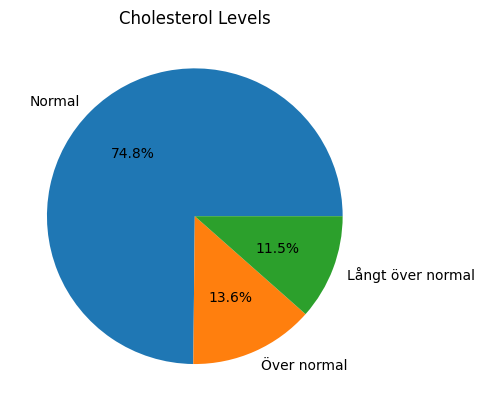

In [21]:
eda.plot_cholesterol_distribution()

### hur ser åldersfördelningen ut? histogram

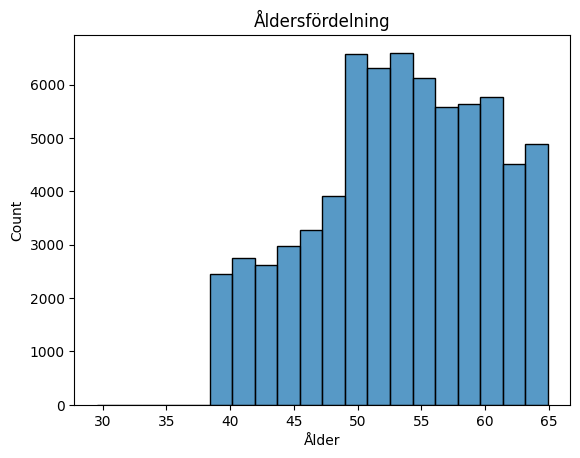

In [22]:
eda.plot_age_distribution()

### hur stor andel röker?

Andel rökare 6169
Andel icke rökare 63831


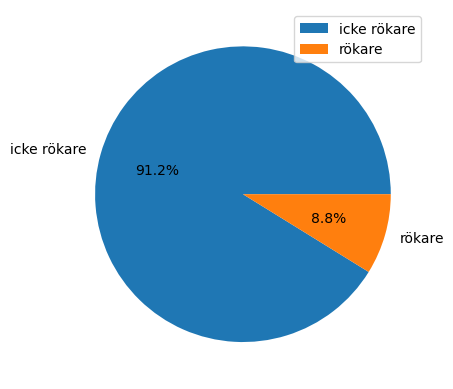

In [23]:
eda.plot_smoking_distribution()

### hur ser viktfördelningen ut? diagram

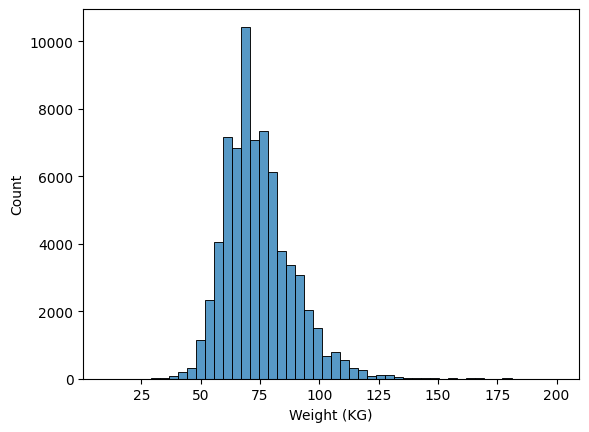

In [24]:
eda.plot_weight_distribution()

### hur ser längdfördelningen ut? diagram

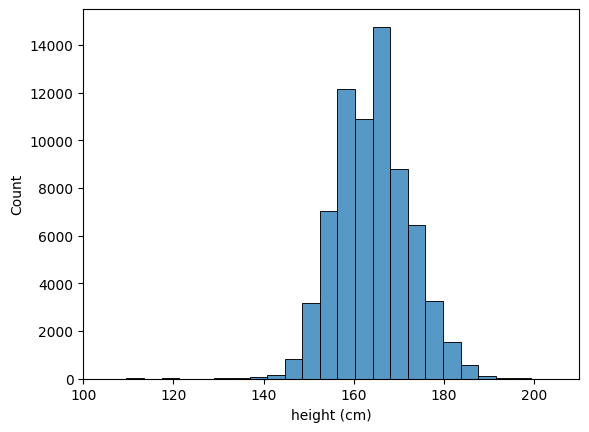

In [25]:
eda.plot_height_distribution()

### hur stur andel av kvinnor respektive män har hjärt-kärlsjukdom? diagram

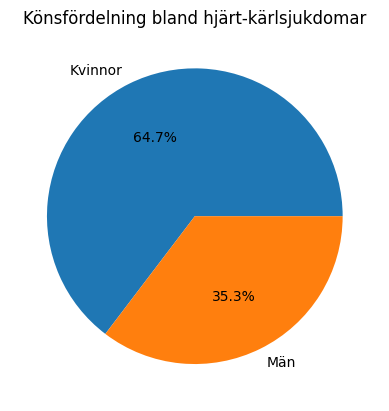

In [26]:
eda.plot_gender_distribution()

# Feature engineering
BMI klasser - slänger orimliga BMIER och outliers och skapar en kolumn med kategorierna normal range, over-
weight, obese (class I), obese (class II), obese (class III)

Blodtrycksklasser, likt ovan med klasserna: healthy, elevated, stage 1 & 2 hypertension och hypertension crisis.

In [27]:
feature_engineering = FEng(df=df)

df = feature_engineering.engineer_features()

print(df["blood pressure class"].value_counts())
print("\n\n",df["bmi class"].value_counts())

blood pressure class
stage 1 hypertension    32428
stage 2 hypertension    22559
healthy                  9540
elevated                 3109
hypertension crisis      1006
Name: count, dtype: int64


 bmi class
over-weight          25479
normal range         25035
obese (class I)      12020
obese (class II)      4334
obese (class III)     1774
Name: count, dtype: int64


# visualiseringar andel sjukdomar

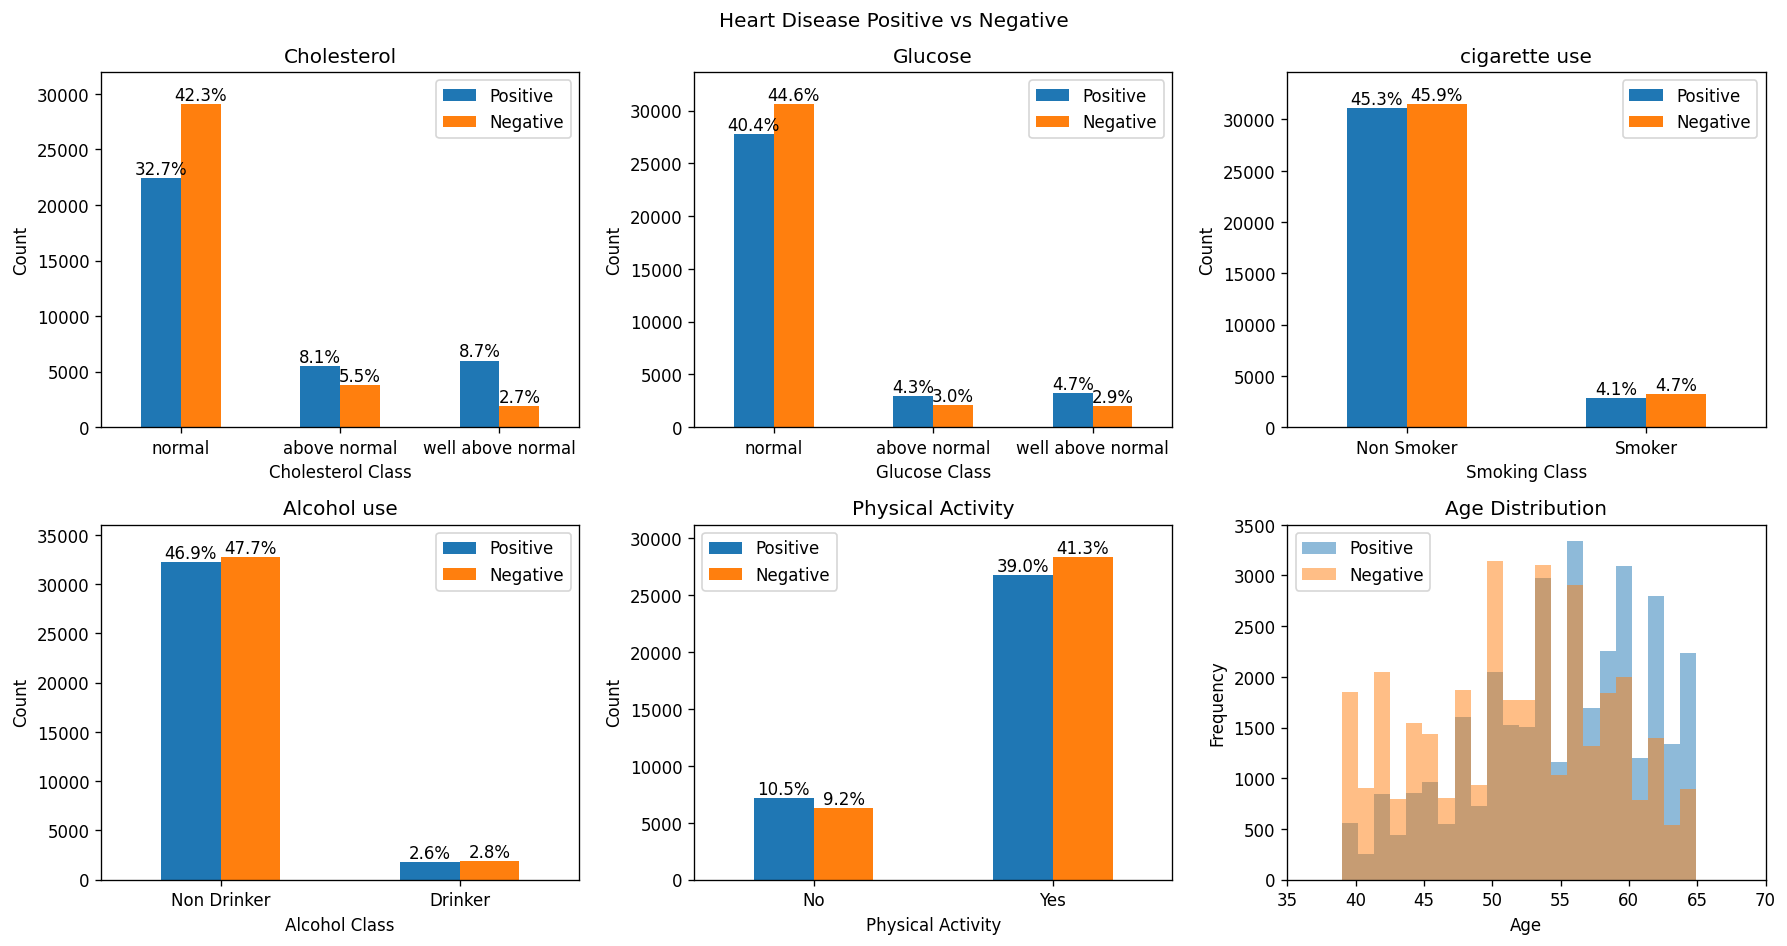

In [28]:
viz = Viz(df=df)

viz.subplot_negative_vs_positive()

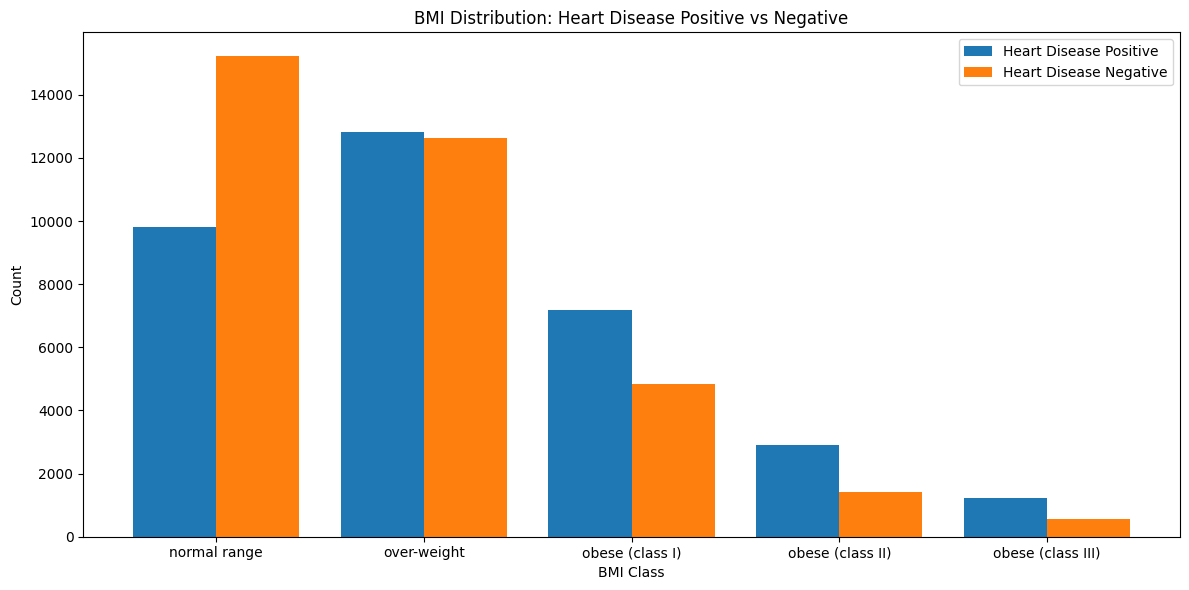

In [29]:
viz.plot_positive_vs_negative_bmi()

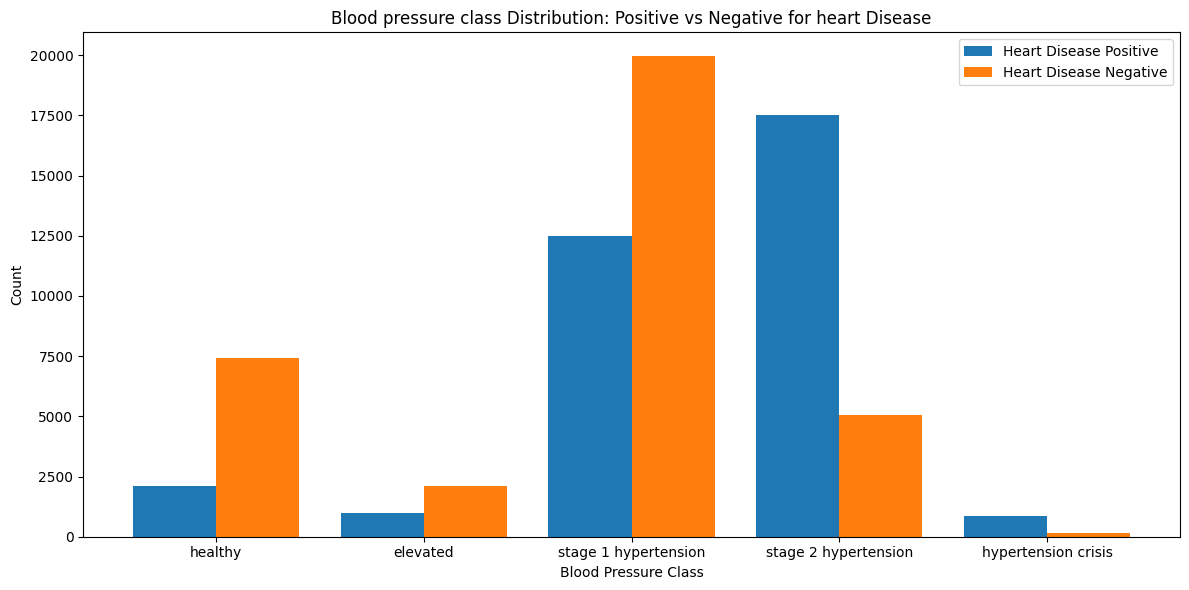

In [30]:
viz.plot_positive_vs_negative_bp()

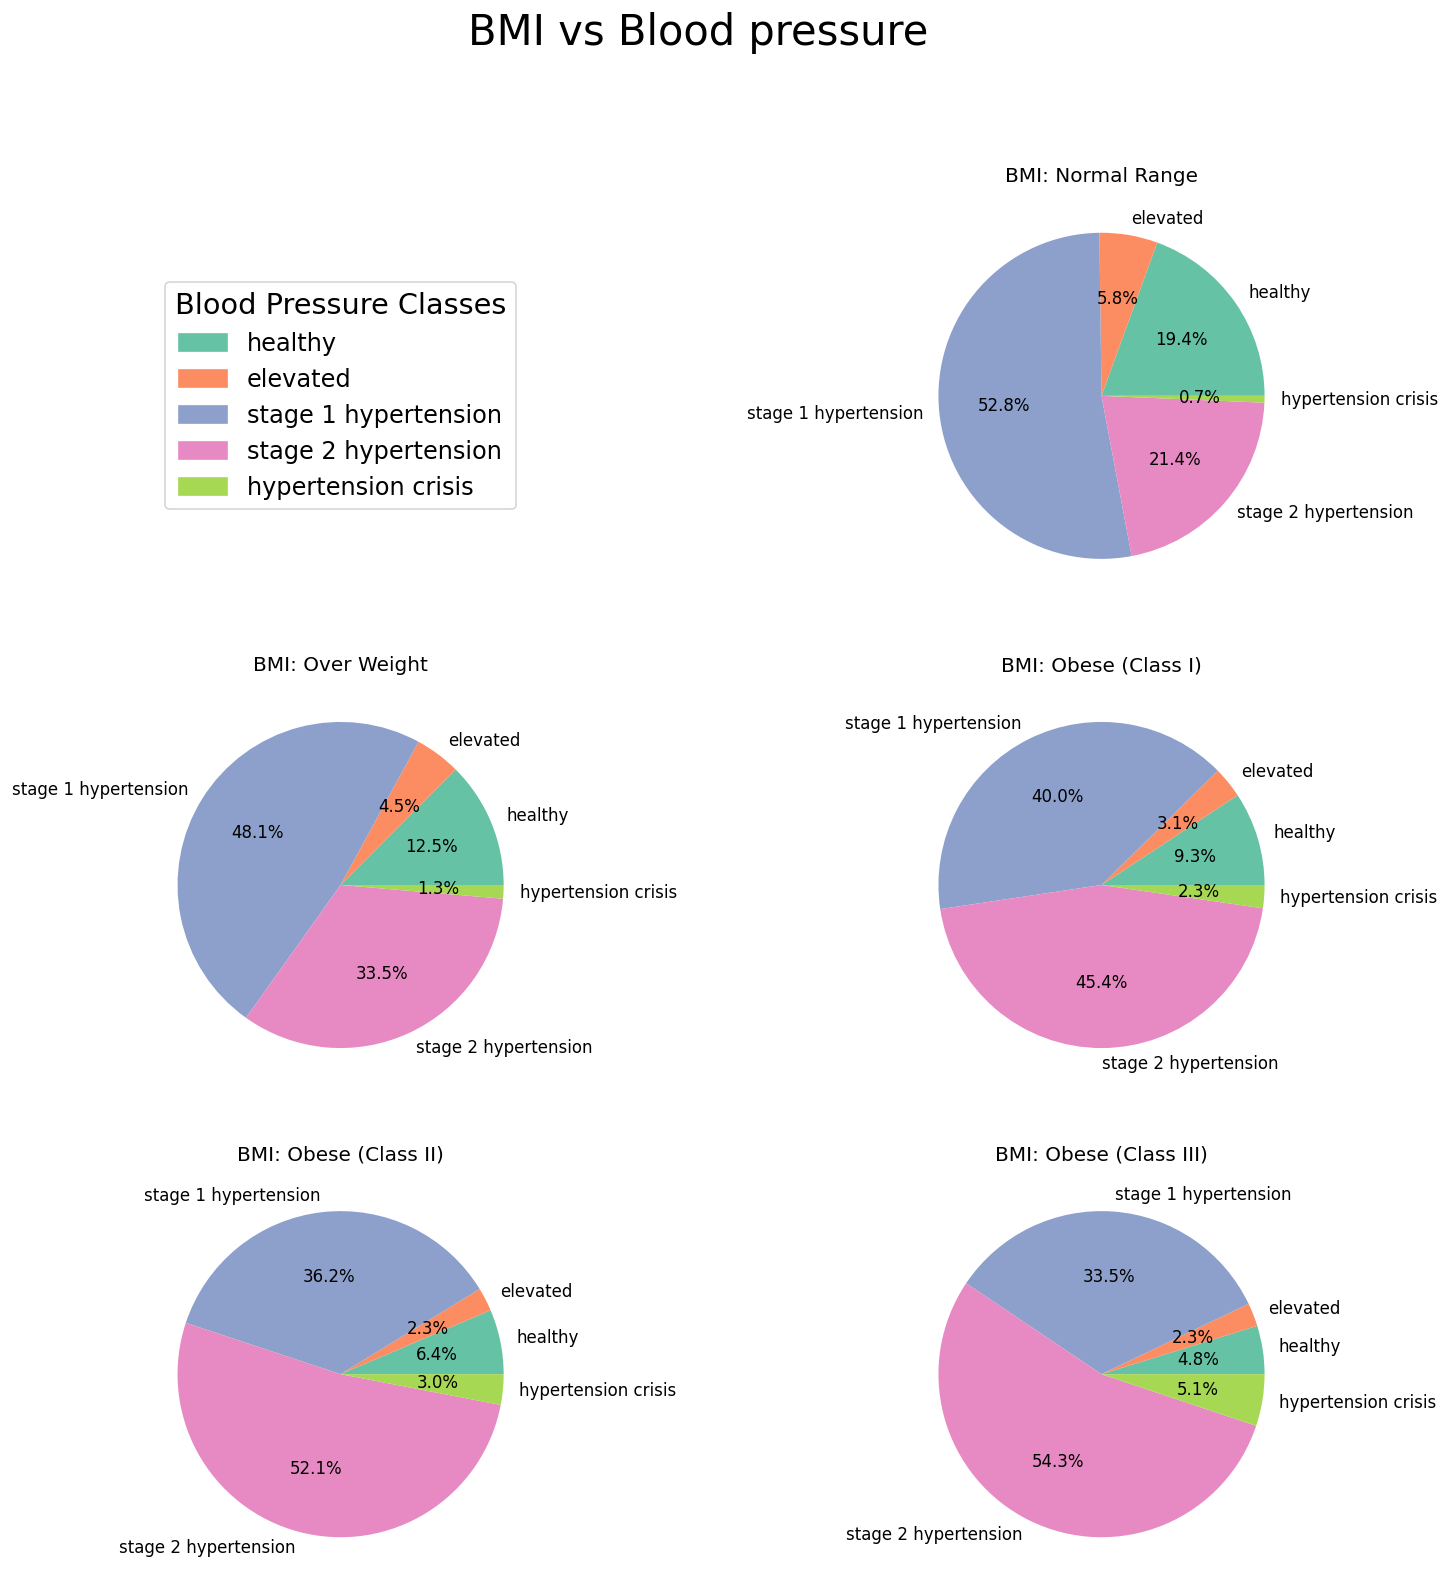

In [31]:
viz.plot_bmi_vs_bp()

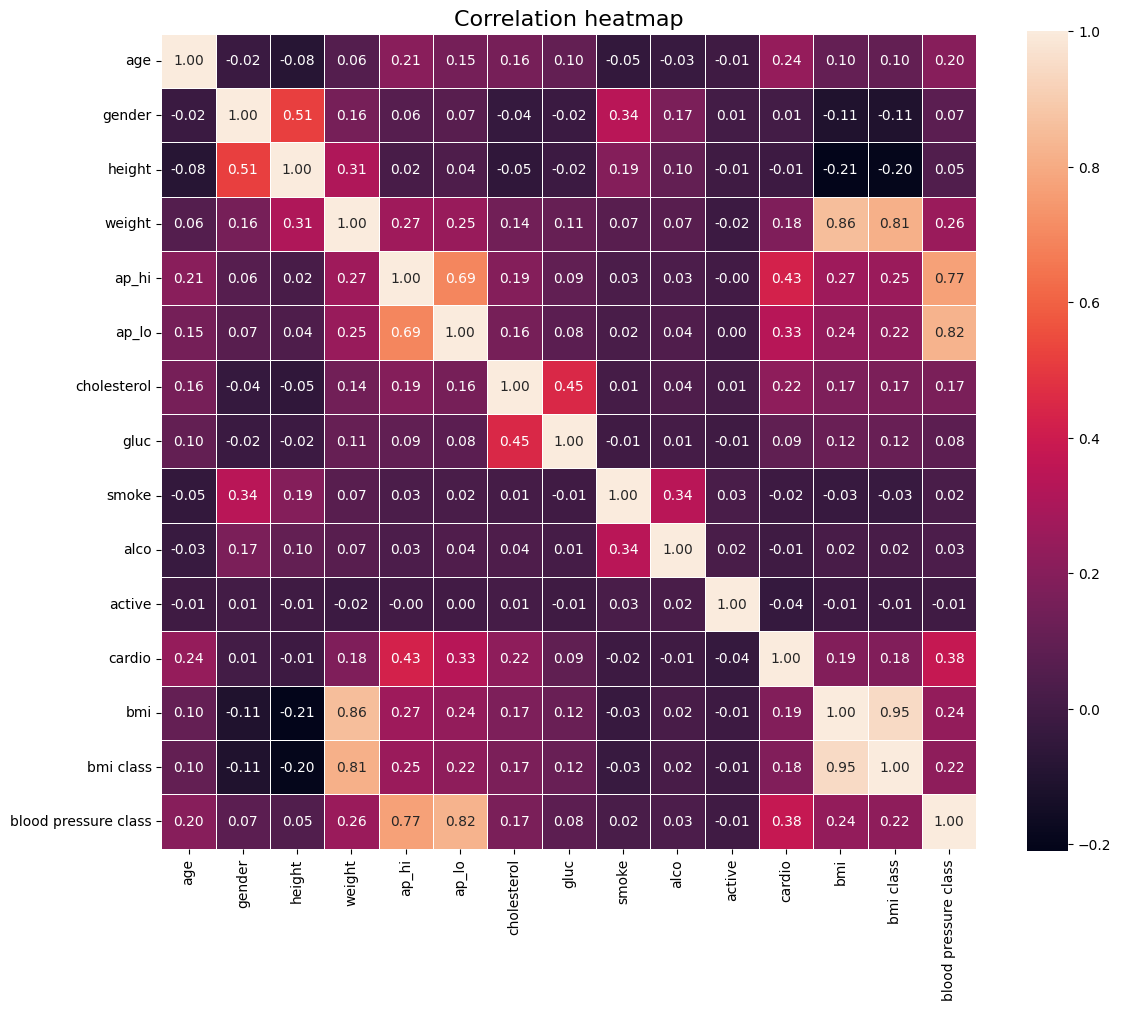

In [32]:
viz.plot_heatmap()

# ML pipeline

eftersom Feature Engineering klassen sparar 2 set till CSV så kan vi passa in dem i Machine Learning klassen här. Och sedan Köra hela Pipelinen. OBS att denna delen har gjorts redan en gång så denna klassen är endast skapad för att visa resultat i en notebook på detta viset.

In [33]:
set_1 = pd.read_csv("./data/cardio_set1.csv", index_col=0)
set_2 = pd.read_csv("./data/cardio_set2.csv", index_col=0)

set_1 = MachineLearning(df=set_1)
set_2 = MachineLearning(df=set_2)


In [39]:
set_1.run_full_pipeline()

KeyboardInterrupt: 

In [ ]:
print(set_2)

c:\Users\ludwi\repos\Medical-predictions-lab\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ludwi\repos\Medical-predictions-lab\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ludwi\repos\Medical-predictions-lab\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ludwi\repos\Medical-pred

Evaluating best Random Forest model on test set:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      5195
           1       0.75      0.68      0.71      5101

    accuracy                           0.73     10296
   macro avg       0.73      0.73      0.73     10296
weighted avg       0.73      0.73      0.73     10296



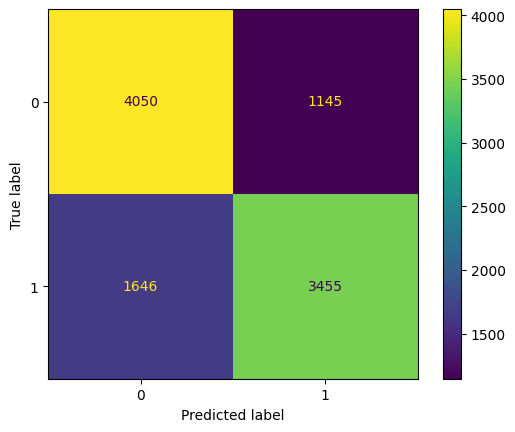

({'Random forest': {'model': RandomForestClassifier(max_depth=10, min_samples_leaf=8, n_estimators=200),
   'params': {'max_depth': 10,
    'min_samples_leaf': 8,
    'min_samples_split': 2,
    'n_estimators': 200},
   'accuracy': 0.7368165485092746,
   'precision': 0.7561837455830389,
   'recall': 0.6807157057654075,
   'f1': 0.7164678803096882},
  'Logistic regression': {'model': LogisticRegression(C=100, penalty='l1', solver='saga'),
   'params': {'C': 100, 'penalty': 'l1', 'solver': 'saga'},
   'accuracy': 0.7302126833058172,
   'precision': 0.748126928162186,
   'recall': 0.6749502982107356,
   'f1': 0.7096571906354515},
  'KNN': {'model': KNeighborsClassifier(n_neighbors=50),
   'params': {'n_neighbors': 50, 'weights': 'uniform'},
   'accuracy': 0.7262309410507914,
   'precision': 0.7422748191978962,
   'recall': 0.6733598409542744,
   'f1': 0.7061398936724695}},
 VotingClassifier(estimators=[('rf',
                               RandomForestClassifier(max_depth=10,
            

In [35]:
set_2.run_full_pipeline()

In [36]:
print(set_2)

Best model after Gridsearch Results:
Best model: Random forest
Accuracy: 0.7368
Precision: 0.7562
Recall: 0.6807
F1 Score: 0.7165
Best parameters: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
set_2.classification_report()

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      5195
           1       0.75      0.68      0.71      5101

    accuracy                           0.73     10296
   macro avg       0.73      0.73      0.73     10296
weighted avg       0.73      0.73      0.73     10296



In [38]:
set_2.confusion_matrix()

AttributeError: 'tuple' object has no attribute 'fit'